In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

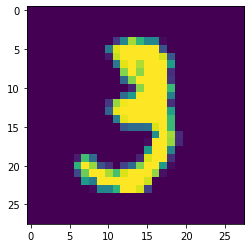

In [7]:
plt.imshow(x_train[10])

In [8]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

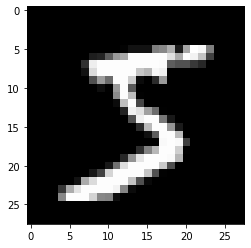

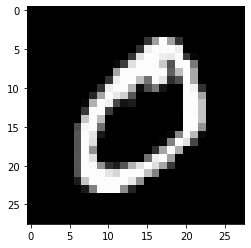

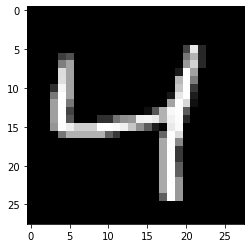

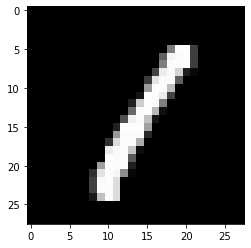

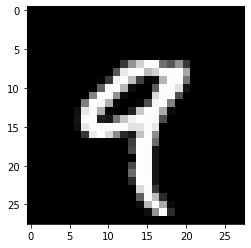

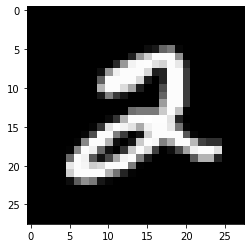

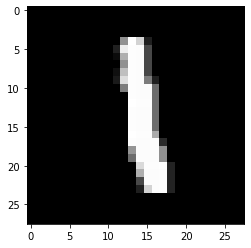

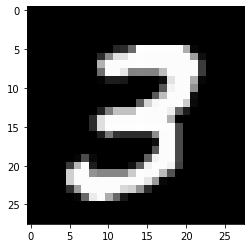

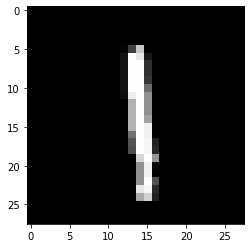

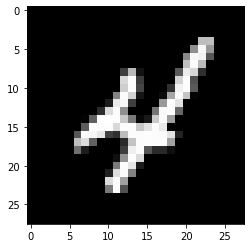

In [9]:
for i in range(10):
  plt.imshow(x_train[i],cmap='gray')
  plt.show()

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [15]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
model=Sequential()

In [25]:
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                100384    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)               

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [28]:
history=model.fit(x_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
300/300 [==============================] - 55s 182ms/step - loss: 1.3454 - accuracy: 0.5562
Epoch 2/10
300/300 [==============================] - 54s 182ms/step - loss: 0.4500 - accuracy: 0.8640
Epoch 3/10
300/300 [==============================] - 54s 181ms/step - loss: 0.3152 - accuracy: 0.8993
Epoch 4/10
300/300 [==============================] - 54s 182ms/step - loss: 0.2563 - accuracy: 0.9169
Epoch 5/10
300/300 [==============================] - 54s 181ms/step - loss: 0.2203 - accuracy: 0.9293
Epoch 6/10
300/300 [==============================] - 54s 181ms/step - loss: 0.2022 - accuracy: 0.9346
Epoch 7/10
300/300 [==============================] - 54s 180ms/step - loss: 0.1816 - accuracy: 0.9402
Epoch 8/10
300/300 [==============================] - 54s 180ms/step - loss: 0.1723 - accuracy: 0.9439
Epoch 9/10
300/300 [==============================] - 54s 179ms/step - loss: 0.1665 - accuracy: 0.9447
Epoch 10/10
300/300 [==============================] - 54s 179ms/step - l

In [29]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0362 - accuracy: 0.9898


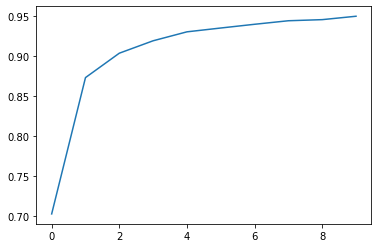

In [30]:
plt.plot(history.history['accuracy'])

In [31]:
prediction=model.predict(x_test)

In [33]:
print(np.argmax(np.round(prediction[50])))

6


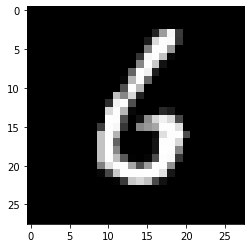

In [34]:
plt.imshow(x_test[50].reshape(28,28),cmap='gray')
plt.show()